In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv("C:\\Users\\Dell\\Downloads\\medical_insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [5]:
data.duplicated().any()

np.True_

In [6]:
print(data.duplicated().sum())

1435


In [7]:
data=data.drop_duplicates(keep='first')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
continous_columns=['age','bmi','charges']


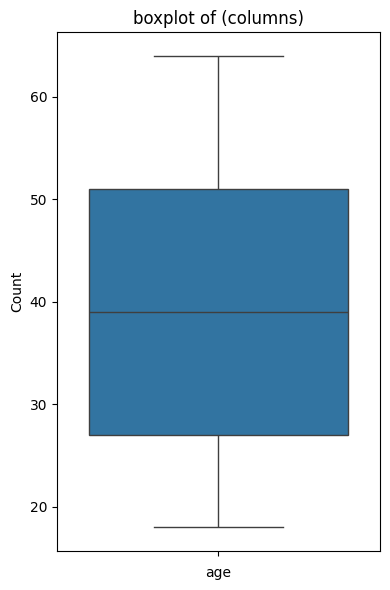

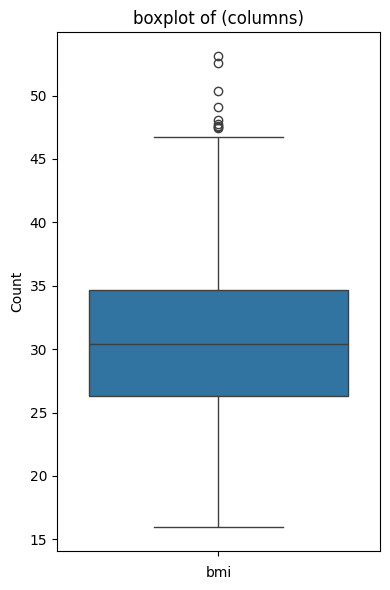

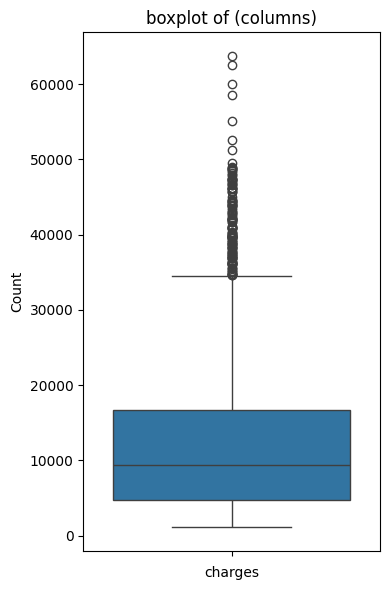

In [11]:
for columns in continous_columns:
    plt.figure(figsize=(4,6))
    sns.boxplot(data[columns])
    plt.title(f"boxplot of (columns)")
    plt.xlabel(columns)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
data['age']=lb.fit_transform(data['age'])
data['smoker']=lb.fit_transform(data['smoker'])
data['charges']=lb.fit_transform(data['charges'])
data['region']=lb.fit_transform(data['region'])
data['sex']=lb.fit_transform(data['sex'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_18132\3147671945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=lb.fit_transform(data['age'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18132\3147671945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker']=lb.fit_transform(data['smoker'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18132\3147671945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 83.6 KB


In [14]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

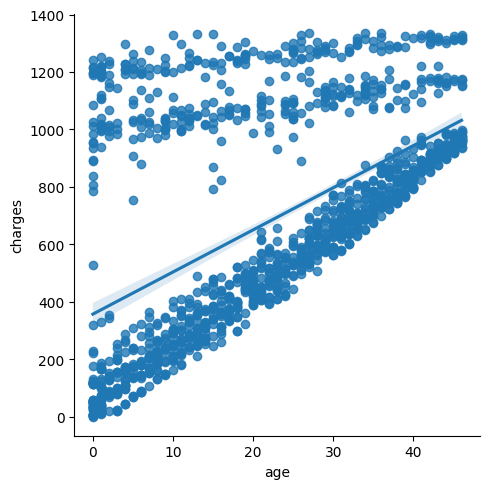

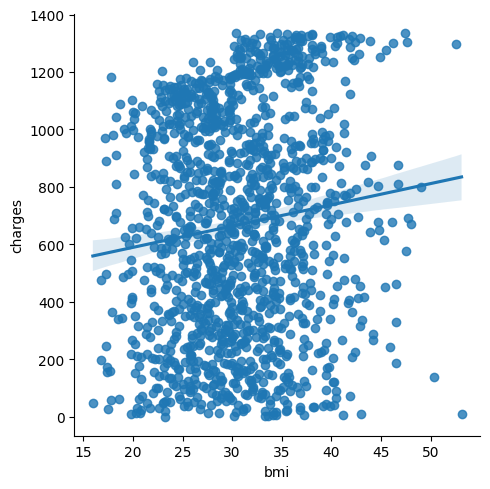

In [15]:
# Scatter plot with regression line
sns.lmplot(x='age', y='charges', data=data)
plt.show()
# Scatter plot with regression line
sns.lmplot(x='bmi', y='charges', data=data)
plt.show()

In [16]:
x=data[['age','sex','bmi','children','smoker','region']]
y=data['charges']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 83.6 KB


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=(train_test_split(x,y,test_size=0.2,random_state=42))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
lr=LogisticRegression('liblinear')
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y1=lr.predict(x_test)

In [25]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
svr= SVR()
svr.fit(x_train,y_train)

SVR()

In [27]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [29]:
y2=svr.predict(x_test)
y3=gr.predict(x_test)
y4=rf.predict(x_test)

In [31]:
#compare
df1=pd.DataFrame({'Actual':y_test,'Linear_regression':y1,'SVR':y2,'Gradient_Boosting':y3,'Random_forest':y4})

In [32]:
df1

,Actual,Linear_regression,SVR,Gradient_Boosting,Random_forest
900,626,666,661.981641,693.434279,684.36
1064,410,616,645.376251,448.430183,390.45
1256,803,773,683.095245,797.284492,793.20
298,1242,1214,711.285579,1250.786148,1258.61
237,309,243,605.587483,400.551093,407.93
...,...,...,...,...,...
534,937,799,709.378385,928.088700,945.40
542,941,927,712.990042,934.821589,950.67
760,258,223,611.488649,421.001699,687.42
1284,1316,1321,731.536887,1328.505911,1319.76


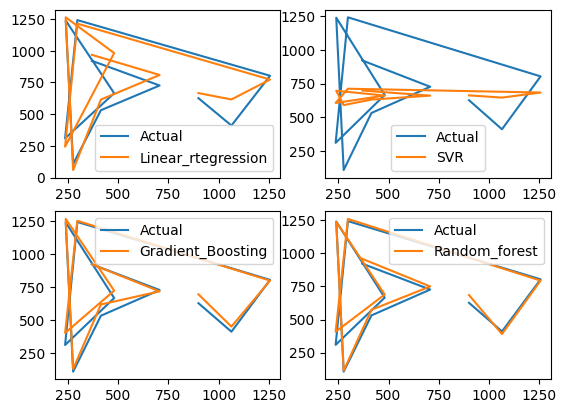

In [36]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Linear_regression'].iloc[0:11],label='Linear_rtegression')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVR'].iloc[0:11],label='SVR')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Gradient_Boosting'].iloc[0:11],label='Gradient_Boosting')
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Random_forest'].iloc[0:11],label='Random_forest')
plt.legend()

In [37]:
from sklearn import metrics


In [39]:
#lr
score1= metrics.r2_score(y_test,y1)
#svm
score2= metrics.r2_score(y_test,y2)
#gradient boosting regression
score3=metrics.r2_score(y_test,y3)
#random forest
score4=metrics.r2_score(y_test,y4)
                        

In [40]:
score1

0.6792957031815102

In [41]:
score2

0.2067610094408705

In [42]:
score3

0.8644086317340176

In [43]:
score4

0.8151978499941664

In [45]:
# gradient boosting regression is best moddel